Initializing Populations ['100001111', '101110100', '001000111', '001101100', '000010111', '011011101', '101000101', '100100010', '001001101', '100101110', '000100011', '010110111', '001000110', '000111100', '001000110', '101110001', '100010001', '001001011', '010001101', '001011010', '001011000', '011100111', '100011100', '100111110', '100100010', '101000111', '101011010', '100100000', '011100011', '011001010', '011011100', '100001010', '010010010', '001010011', '001111001', '101010110', '000010010', '010011100', '101100101', '011000100', '001010010', '100011001', '011100110', '110000010', '011100111', '001011000', '011101111', '000010101', '001011010', '000000001']


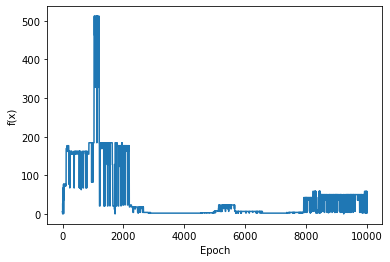

In [1]:
import numpy as np
from matplotlib import pyplot as plt
 
PRECISION = 10.0  # 自变量精度
INDIVIDUALS_NUM = 50  # 初始化个体数量
EVOLUTION_NUM = 10000  # 进化次数
LOWER_LIMIT = -20  # 染色体下限值
UPPER_LIMIT = 20  # 染色体上限值
CROSS_RATE = 0.6  # 交叉概率
MUTATION_RATE = 0.005  # 变异概率
 
 
def encoder(x):
    result = []
    for i in x:
        i = bin(int((i + 20) * PRECISION))[2:]
        for j in range(9 - len(i)):
            i = '0' + i
        result.append(i)
    return result
 
 
def decoder(x):
    result = []
    for i in x:
        i = int(i, 2) - 200
        i = i / PRECISION
        result.append(i)
    return result
 
 
def initialize():
    def transform(x):
        return (x - 200) / PRECISION
 
    p = np.random.randint(0, 400, size=INDIVIDUALS_NUM)
    p = encoder(list(map(transform, p)))
    return p
 
 
def choose(x, ada):
    x, ada = np.asarray(x), np.asarray(ada)
    #print('概率情况',(1-ada / ada.sum())/(INDIVIDUALS_NUM-1))
    index = np.random.choice(np.arange(INDIVIDUALS_NUM), size=INDIVIDUALS_NUM, replace=True, p=(1-ada / ada.sum())/(INDIVIDUALS_NUM-1))
    #print('\nChoose index:', index)
    return x[index]
 
 
def threshold_limit(x):
    l = []
    l.append(x)
    x = decoder(l)[0]
    if x >= -20 and x <= 20:
        return True
    else:
        return False
 
 
def cross(x):
    result = []
    for chromosome in x:
        chromosome_A = list(chromosome)
        if np.random.rand() < CROSS_RATE:
            chromosome_B = x[np.random.randint(INDIVIDUALS_NUM)]
            cross_points = np.random.randint(low=0, high=8)
            # 观察交叉后的数据会不会超过自变量x的阈值
            fake = chromosome_A
            fake[cross_points:] = list(chromosome_B)[cross_points:]
            if threshold_limit(''.join(fake)):
                chromosome_A = fake
        result.append(''.join(chromosome_A))
    return result
 
 
def mutations(x):
    result = []
    for chromosome in x:
        if np.random.rand() < MUTATION_RATE:
            mut_points = np.random.randint(0, 8)
            chromosome = list(chromosome)
            # 观察变异后的数据会不会超过自变量x的阈值
            fake = chromosome
            fake[mut_points] = '1' if chromosome[mut_points] == '0' else '0'
            if threshold_limit(''.join(fake)):
                chromosome = fake
        result.append(''.join(chromosome))
    return result
 
 
def adaptability(list):
    result = []
    for i in list:
        result.append(2 * pow(i, 2))
    return result
 
 
def best_chr(x):
    dec = decoder(x)
    ada = adaptability(dec)
    best_index = np.argmin(ada)
    return (ada[best_index])
 
 
if __name__ == '__main__':
    # 初始化种群
    pop = initialize()
    #print(decoder(pop))
    print('Initializing Populations', pop)
    best=[]
    for i in range(EVOLUTION_NUM):
        ada = adaptability(decoder(pop))
        #print('Adaptability', ada)
        pop = cross(pop)
        #print('Cross', pop)
        pop = mutations(pop)
        #print('Chromosome',pop)
        #print('hanshuzhi',decoder(pop))
        pop = choose(pop, ada)
        #print('Choose', pop)
        best.append(best_chr(pop))
 
    plt.plot(range(EVOLUTION_NUM), best)
    plt.ylabel('f(x)')
    plt.xlabel('Epoch')
    plt.show()